# Real-World Project 1

Begin this project in Week 2 and turn it in for feedback in Discussions by Sunday (11:59 PM) in Week 3. Respond to two of your colleagues by Thursday (11:59 PM) of Week 4 and finally turn in your project on Sunday (11:59 PM) of week 4.

If you are working in Google Colab, you will need to upload your data files, using the file icon on the left. If you are working in Jupyter Lab, be sure your data files are in the folder that you are using.

Note that in this Jupyter notebook, I have included some figures. If you click on the figure, it will look like a long list of characters. Just go back out of editing mode to see the picture.



In [36]:
# These are the Basic imports used in the Ch01 notebook that came with the text Essential Math
# change to whatever you need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

## This project is a modified version of what is in the text - Essential Math
1.3 Hands-On Project: Gradient Descent
In this hands-on project, you’ll learn the math behind an important method leveraging derivatives to optimize cost functions (minimize the error): gradient descent.

You’ll define a cost function used for linear regression. You’ll learn to implement a prediction function, evaluate the error with a cost function, and use the derivative of this cost function to optimize the parameters of your model. (what you’ll learn here applies to other algorithms, like neural networks. Using different prediction function, cost function, or update rules gives you the possibility to build various algorithms.)

### 1.3.1 Cost function

As humans, we rely on feedback to learn a new skill. You can try
something, use the feedback to see how well or badly you performed, and
iterate until the feedback is positive.

Training a model is similar. You first need a way to assess its
performances. The **loss** is a value that tells you how badly the model
performs for a given data sample: it is zero if the estimation is
perfect and increases when the prediction is less good. **Training the
model** means changing its parameters to reduce the loss as much as
possible.

In this Real-World project, you’ll see the example of linear regression: data
points are fitted with a line, as illustrated with in Figure
[1].

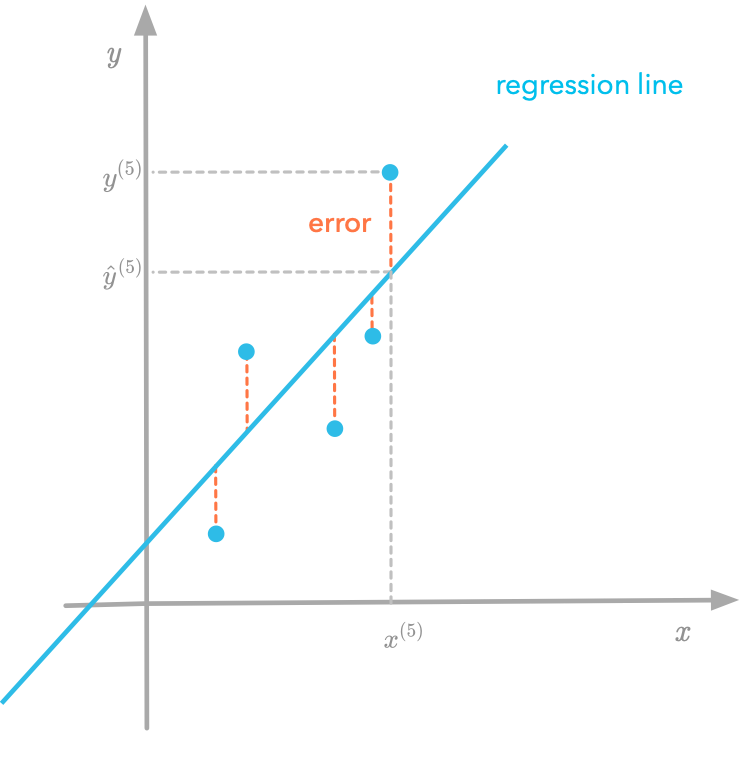

*Figure 1: Data points and the regression line. Errors are represented in red: it is the difference between the estimated value (the point on the line) and the true value.*

Figure [1] shows five data points and the
regression line. The regression line is the line that "best fits" the data. The goal is to find to
the equation of the line
that fits the data well. We call such a line the **regression line**.



# Question 1:

In your own words, describe what a regression line is, generally speaking.**

Regression line is used to tell us the relationship between x variable and y variable it is also known as a best fit line despicted by a linear line. It uses the slope to tell us the strength and direction of variables and how the change in one variable impacts a change in the other. 


**Error**

The error of the model (regression line) is the sum of the vertical distances between
the data points and the estimated values on the model (or regression line). That is, the sum of the lengths of the lines represented in red in figure [1].

There are multiple ways to
calculate a distance. A common choice for linear regression is the
Euclidean distance.

Given data points $(x_1, y_1), (x_2,y_2), \ldots, (x_n,y_n)$ and a regression line $f: \mathbb{R} \Rightarrow \mathbb{R}$, mapping the reals to the reals,

$$\sum_{i=1}^n \sqrt{(f (x_i) - y_i)^2}$$

is one way to represent the error. We see that the distances from the point to the line are squared so that we are always adding positive values to the error. We take the square root to scale it back.


# Mean Squared Error, or MSE

Is another measure of cost.

Averaging the difference across all data samples, you get what is called the
*Mean Squared Error*, or MSE. It corresponds to the average of the
squared differences between estimation and true values across all data
points. It is commonly used for linear regression.

Using different notation, let $\bf{y}$ be the vector of values ${\bf{y}}=[y_1, y_2, \ldots, y_n]$ and $\hat{\bf{y}}$ (pronounced "y hat") be the values on the linear regression line at the inputs $[x_1, x_2, \ldots, x_n]$, $\hat{\bf{y}}= [\hat{y}_1, \hat{y}_2, \ldots, \hat{y}_n]=[f(x_1), f(x_2), \ldots, f(x_n)]$.

Then we can say $$\sum_{i=1}^n (\hat{y}_i - y_i)^2$$ is another way of saying

$$\sum_{i=1}^n (f (x_i) - y_i)^2,$$

The MSE is the average and is defined as follows:



$$ \mbox{MSE} = \frac1n \sum_{i=1}^n (\hat{y}_i - y_i)^2$$



Looking again at Figure [1], you can observe
that some errors are positive (data points below the estimated value)
and some are negative. Squaring the errors allows you to take both into
account to evaluate the error.



##### Prediction Function

In the case of linear regression, the predicted value ${\bf\hat{y}}$ is
calculated with a linear function $f:\mathbb{R} \rightarrow \mathbb {R}$ (the assumption is that a line could
fit our data well):

$$
f(x)=\theta x+b
$$

It is called the *prediction function*, *hypothesis function*, or simply
the *model*. The slope parameter is $\theta$
(the parameter multiplied by $x$) and the intercept is $b$. This
prediction function takes $x$ as input and returns an estimation
$f(x)$ according to your model’s parameters ($\theta$ and $b$).


For now, we’ll simplify the model and use only one parameter: the slope
parameter $f(x) = \theta x$. Intuitively, this means that you force the
line to pass through zero (because the $y$-intercept is $b = 0$).

To calculate the Mean Squared Error, let’s calculate the averaged loss
across data samples. Mathematically, the cost function, usually denoted
as $J(\theta)$, is written as:

$$
J(\theta) = \frac{1}{2n}\sum_{i=1} ^n (\theta x_{i} - y_{i})^2
$$

with $n$ being the number of training examples. The data points ${\bf{y}} = [y_1, y_2, \ldots, y_n]$ are the true values and ${\bf{\hat{y}}} =[ \theta x_1, \theta x_2, \ldots, \theta x_n]$ are the estimated values.
For now, consider these
vectors $\bf y$ and $\bf\hat{y}$ as arrays of values.

Dividing by $2n$ instead of $n$ is done only to simplify the final
result of the cost function derivative. $J(\theta)$ is thus *proportional*
to the MSE.




# Question 2.


# Implementation

Write a function, named `MSE`, in Python that takes in as inputs the vectors $\bf x$, the data sample inputs, and $\bf y$, the data sample true outputs, and $\theta$, the slope of the linear regression estimate. The output of the function should be the cost, defined by $J$ above. To summarize, the cost function takes $x$, $y$ and $\theta$ as inputs
and returns the cost. Hint: The numpy function $\tt{np}$_$\tt{array}$ will turn the value of x and y to arrays that can be algebraically manipulated, term by term.

In [6]:
# Define the MSE function here.
def MSE(x, y, theta):
    x = np.array(x)
    y = np.array(y)
    n = len(y)
    cost = (1 / (2 * n)) * np.sum((theta * x - y) ** 2)
    return cost

# Hints:
𝐱=[2,6,8,11]
y=[2.1,6.1,8.3,10]
print(np.array(x) - np.array(y))
print('the length of the array is',np.array(y).shape[0])

[-0.1 -0.1 -0.3  1. ]
the length of the array is 4


# Question 2 continued

Calculate the cost for ${\bf x} = [2, 6, 8, 11]$ and ${\bf y} = [2.1, 6.1, 8.3, 10]$ and various values of $\theta$. Just experiment to get as small of a cost as you can.

In [7]:
def MSE(x, y, theta):
    x = np.array(x)
    y = np.array(y)
    n = len(y)
    cost = (1 / (2 * n)) * np.sum((theta * x - y) ** 2)
    return cost

x = [2, 6, 8, 11]
y = [2.1, 6.1, 8.3, 10]
theta = 0.966486562

cost = MSE(x, y, theta)
print("Cost (MSE) for theta = {}: {:.4f}".format(theta, cost))

Cost (MSE) for theta = 0.966486562: 0.1050


Let’s illustrate the cost function with the example of three
observations.

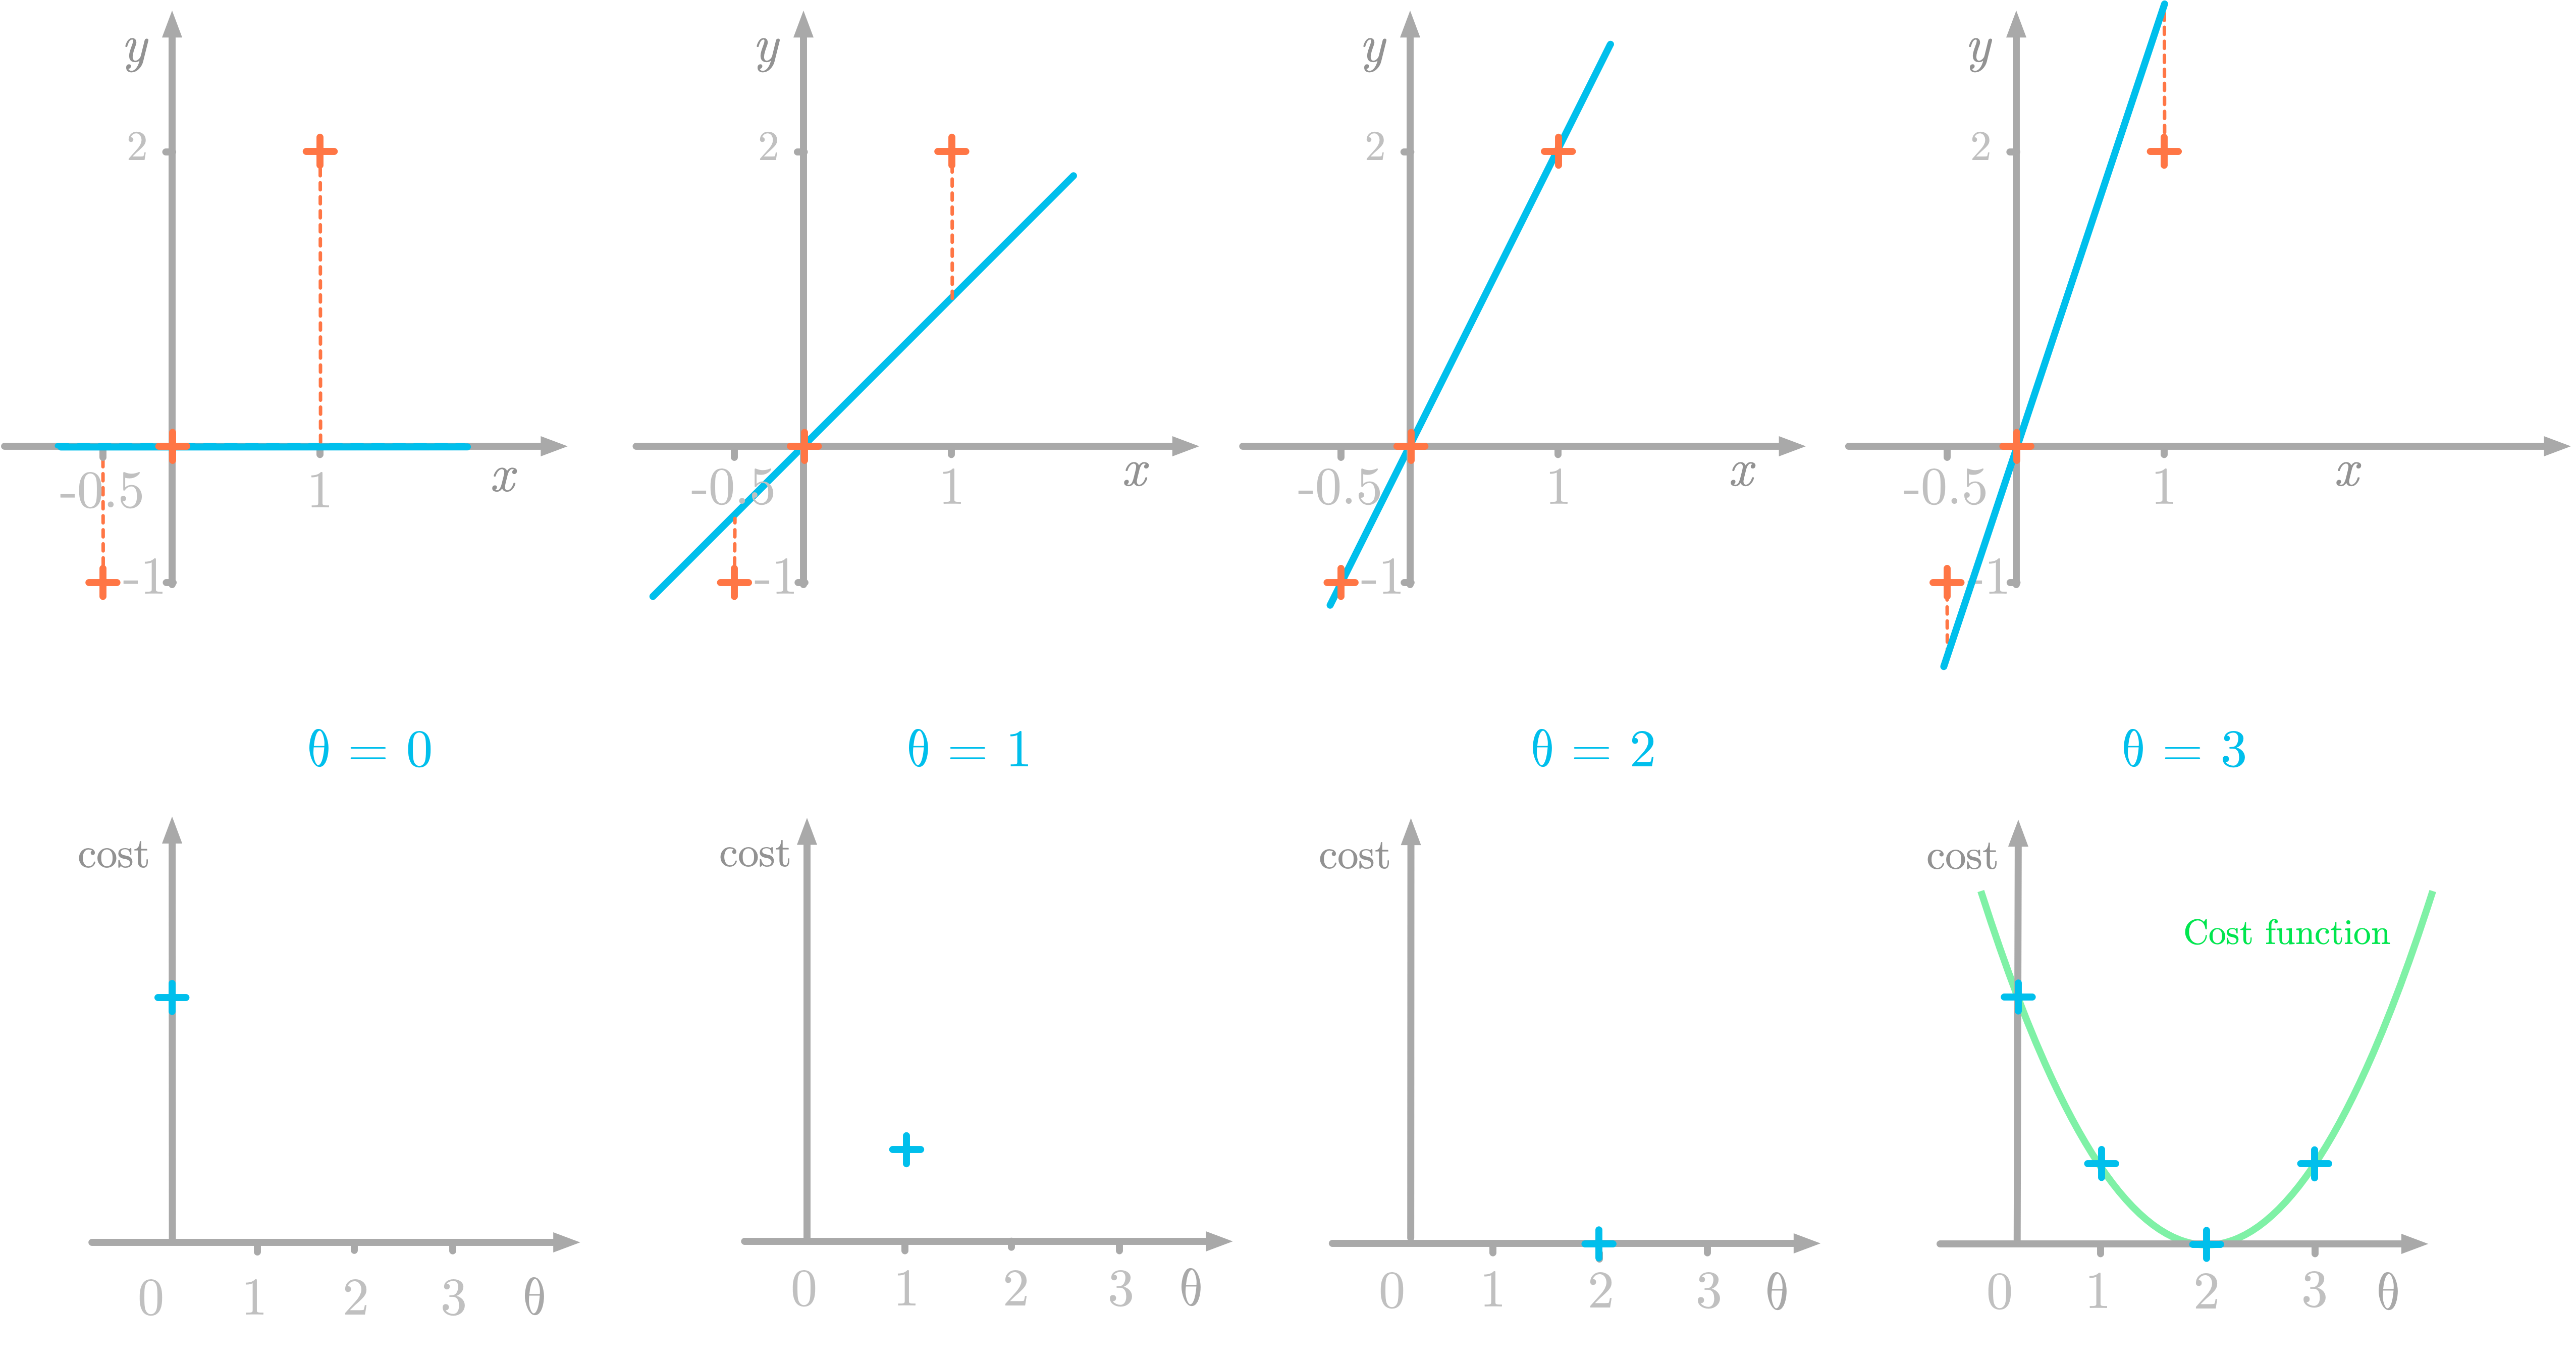



Figure 2: The cost function corresponds to the error of the fit as a function of the parameter <span class="math inline"><em>θ</em></span> (here, the slope), as shown in the bottom figures.

Figure [2] illustrates four different values
of $\theta$ from left to right. The top figures show the three data
points in red and the regression line with a slope of $\theta$. The
bottom figures show the cost as a function of $\theta$. This cost is
calculated as the error of the fit (the dotted red lines in the top
figures). For instance, you can see that the cost is zero when
$\theta=2$ because the fit is perfect.

When you consider the different values of $\theta$, you see the shape of
the MSE the cost function, as in the bottom right panel. However, the
goal of gradient descent is to avoid having to calculate the cost for every
parameter (or combinations of parameters, which would be
computationally very difficult).

### Derivative of the Cost Function

Since derivatives correspond to the slope of a function, it indicates
the direction of $x$ needed to maximize or minimize the function. If the
function has multiple parameters, you need to know how to move in
multiple directions and calculate the derivative with respect to each of
these directions: the partial derivatives (see
Section 1.1.5 in the textbook). The gradient is
a vector containing the partial derivatives for all directions and
** gradient descent ** is the method used to find the minimum of cost
functions.

Let’s differentiate the MSE cost function defined in the last section.
You want to find:

$$
\frac{d J(\theta)}{d\theta} = \frac{d}{d\theta} \left(\frac{1}{2m}\sum_{i=1} ^m \left( \theta x_{i} - y_{i} \right)^2 \right)
$$

The expression $\frac{d J(\theta)}{d\theta}$ corresponds to the
derivative of the cost function $J(\theta)$ with respect to $d\theta$.

First, you can get $\frac{1}{2m}$ out from the derivative because of the
multiplication by constant rule. The sum can also be extracted because
of the sum rule. You get:

$$
\frac{d J(\theta)}{d\theta} = \frac{1}{2m}\sum_{i=1} ^m \frac{d}{d \theta} \left((\theta x_{i} - y_{i})^2\right)
$$

You’ll need the chain rule
(Section 1.1.4.4)
to differentiate this composite function. Let’s use the Lagrange
notation and create an intermediate function $g(\theta)$ such as:

$$g(\theta)=\theta x - y$$

We omitted the index $i$ for clarity. Let’s also denote $f(g(x))$ or
simply $f(g)$:

$$f(g) = g^2$$

From the derivatives rules, the derivatives of these two functions are:

$$g'(\theta) = x, \mbox{ since } x \mbox{ is a constant}$$

$$f'(g)= 2g$$

Using the chain rule from
Section 1.1.4.4,
you get:

$$
\begin{aligned}
(f(g))' &= f'(g) \cdot g' \\\\
&= 2g \cdot x \\\\
&= 2 (\theta x - y ) \cdot x
\end{aligned}
$$

So the derivative of the MSE cost function is defined as:

$$
\begin{aligned}
\frac{d J(\theta)}{d\theta} &= \frac{1}{2m}\sum_{i=1} ^m 2 (\theta x_{i} - y_{i}) \cdot x_i \\\\
&= \frac{1}{m}\sum_{i=1} ^m (\theta x_{i} - y_{i}) \cdot x_{i}, \mbox{ after canceling the 2's}
\end{aligned}
$$

The function $\frac{d J}{d\theta}$ takes the parameter $\theta$ as input
and returns the slope of the tangent of the cost function for this value
of $\theta$. The slope tells you the direction that you must take to
minimize the cost. Look back at the cost function pictured in green in
Figure [2]: for instance, the slope of the
tangent line at $\theta = 0$ is negative. It means that you need to
increase the value of $\theta$ to reach the minimum of the cost
function. Conversely, the slope of the tangent is positive for
$\theta = 3$, meaning that the value of $\theta$ that minimizes the cost
is smaller than three.

You can now implement the derivative of the cost function (try to do it
yourself, and then look at the solution):

# Question 3

# Derivative of cost function

Define the derivative of the cost function in Python with inputs x, y, and theta. You give a value of $\theta$ and arrays containing the $x$ values and
the $y$ values, and the function returns the slope of the tangent of the
cost function for this $\theta$.

In [31]:
# Your answer for #3 goes here.
# Define the function MSE_derivative

def MSE_derivative(x, y, theta):
    x = np.array(x)
    y = np.array(y)
    n = len(y)
    cost = (1 / n) * np.sum((theta * x - y) * x)
    return cost


x = [2, 6, 8, 11]
y = [2.1, 6.1, 8.3, 10]
print(np.array(x) - np.array(y))
print('the length of the array is',np.array(y).shape[0])

# Compute derivative of cost function with respect to theta
slope_of_tangent = MSE_derivative(theta, x, y)
print("Slope of the tangent of the cost function:", slope_of_tangent)

[-0.1 -0.1 -0.3  1. ]
the length of the array is 4
Slope of the tangent of the cost function: 5.2868427668437405


# Question 3 continued

Calculate the derivative of the cost function for ${\bf x} = [2, 6, 8, 11]$ and ${\bf y} = [2.1, 6.1, 8.3, 10]$ and various values of $\theta$. Experiment with the derivative (slope of the line) to zero in on the value of theta that gives the smallest cost. If the slope is positive, try a smaller value of theta. If the slope is negative, try a larger value of theta. Show all the tries you make.

In [43]:
# Answer for Question 3 continued goes here

def MSE_derivative(x, y, theta):
    x = np.array(x)
    y = np.array(y)
    n = len(y)
    cost = (1 / n) * np.sum((theta * x - y) * x)
    return cost

x = np.array([2, 6, 8, 11])
y = np.array([2.1, 6.1, 8.3, 10])

theta = 1 
cost = MSE_derivative(x, y, theta)
print(cost)

theta = 0.9
cost = MSE_derivative(x, y, theta)
print(cost)

theta = 0.95
cost = MSE_derivative(x, y, theta)
print(cost)

theta = 0.97
cost = MSE_derivative(x, y, theta)
print(cost)

theta = 0.98
cost = MSE_derivative(x, y, theta)
print(cost)

theta = 0.99
cost = MSE_derivative(x, y, theta)
print(cost)

print("theta at 0.9 gives the smallest cost of -0.367499999")


1.949999999999999
-3.674999999999999
-0.8625000000000047
0.26249999999999885
0.8249999999999968
1.3874999999999997
theta at 0.9 gives the smallest cost of -0.367499999


# Implementing Gradient Descent

Now that you have the cost function derivative, you’ll be able to
optimize the parameter $\theta$ (the slope of the fitting line).

Here are the steps:

-   Start with the parameter (the slope) equals to 0.
-   Calculate the derivative for this parameter.
-   Update the parameter in the direction that decreases the cost.

You can then repeat the steps 1 and 2.

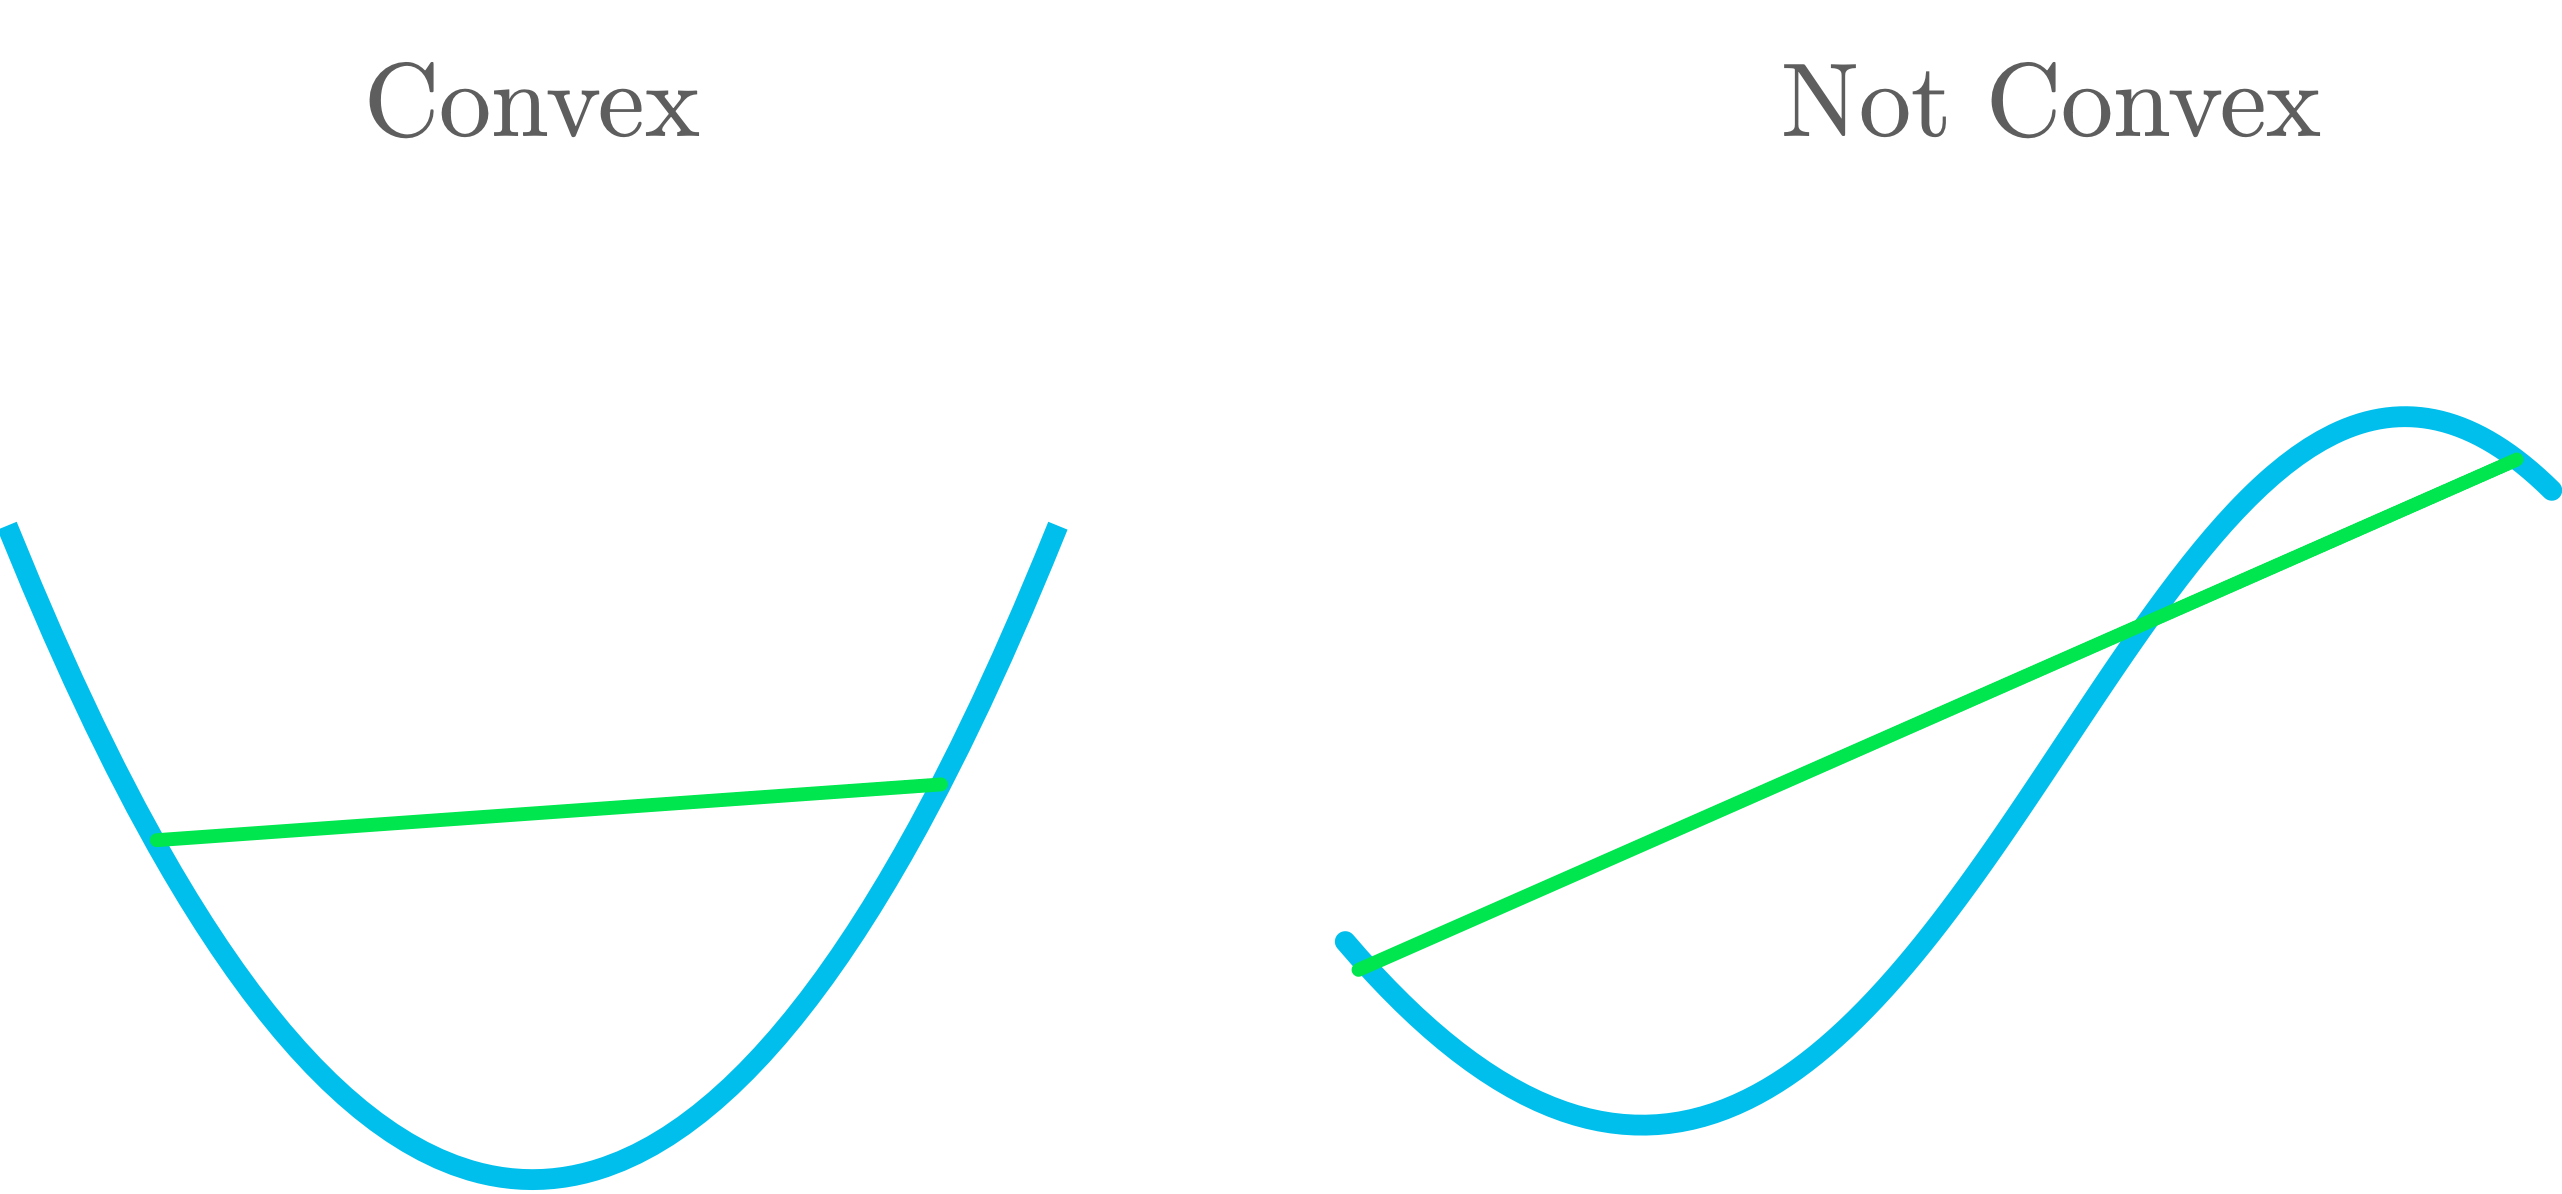





Figure 3: The left figures shows a convex function: all lines between pairs of points are above the curve. The right panel shows a non-convex function with an example of line that lies below the curve.

This process can’t work if your cost function is not *convex*. A convex
function has the shape of a bowl and is defined as follows: if you draw
a line between any pair of points in the curve, this line will be above
or on the curve (see Figure [3]).

#### Dataset

You’ll implement gradient descent on a dataset on red wine quality,
where various chemical properties of wines are described (the dataset
comes from here: https://archive.ics.uci.edu/ml/datasets/wine+quality.
The related paper is Cortez, Paulo, et al. “Modeling wine preferences by
data mining from physicochemical properties.” Decision Support Systems
47.4 (2009): 547-553.) .

The dataset came attached to the assignment. Let’s have a look at the first rows and columns:

In [13]:
# the data set is now the csv file.
data = pd.read_csv("winequality-red.csv", sep=";")
data.iloc[:6, :6]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0
1,7.8,0.88,0.00,2.6,0.098,25.0
2,7.8,0.76,0.04,2.3,0.092,15.0
3,11.2,0.28,0.56,1.9,0.075,17.0
4,7.4,0.70,0.00,1.9,0.076,11.0
5,7.4,0.66,0.00,1.8,0.075,13.0


The goal is to implement linear regression to model the relationship
between two features of this dataset: the *fixed acidity* of the wine and
its *density*. Notice that these are two of the headings. You wouldn't see that unless you list the headings out to the 9th one.

In [33]:
#run this code.
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Let’s first look at the scatter plot of these variables:




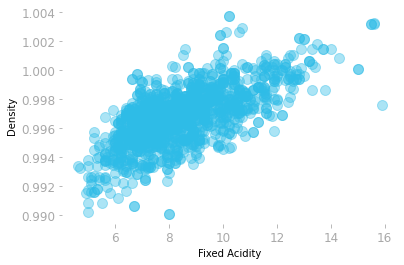

In [38]:
plt.scatter(data['fixed acidity'], data['density'], alpha=0.4)
# [...] Add axes, labels etc.

plt.xlabel("Fixed Acidity")
plt.ylabel("Density")

plt.show()



Figure 4: Density of wines as a function of fixed acidity. Each point corresponds to a data observation.

Let’s create the variables `X` and `Y` from the Pandas dataframe. This doesn't transform the values of the data in any way.

In [16]:
X = data['fixed acidity'].to_numpy().reshape(-1, 1)
X.shape

(1599, 1)

In [17]:
Y = data['density'].to_numpy().reshape(-1, 1)
Y.shape

(1599, 1)

You need to reshape the Numpy arrays to use them in the following
Sklearn method.

You’ll also standardize the data: transform the variables to have a
mean equal to zero and a standard deviation equal to one:

In [18]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
Y = standard_scaler.fit_transform(Y)

#### Derivative of the Cost Function

You can use your `MSE_derivative` function to calculate the derivative
using these data. Let’s try it with $\theta=0$:

In [20]:
#you wll need to define MSE-derivative above in order to follow the rest of this example.
MSE_derivative(x=X, y=Y, theta=0)

-0.6680472921189744

This negative value tells you that you need to increase $\theta$ if you
want to reduce the cost.

#### Parameter Update

A large derivative value means that the slope is steep. In this case,
you want to add or subtract a large value to approach the minimum
rapidly. This is why you update the parameters by subtracting the value
of the derivative to the parameter: a large value will largely change
the parameter and a small value not so much.

In addition, a weight, called the *learning rate*, is applied to the
derivative allowing you to choose how large are the steps done at each
iteration. This is done by multiplying a scalar to the derivative
(called `lr` for ‘learning rate’ in the following code):

In [21]:
lr = 0.01
theta = 0
theta = theta - lr * MSE_derivative(x=X, y=Y, theta=theta)
theta

0.006680472921189744

This is the value of $\theta$ after the update. Let’s iteratively update
the parameters, store the cost and the parameter value and plot the cost
as a function of the parameters:

# Question 4

After reading everything coming before this question, it should make sense what the following code is doing. Insert comments into the following code to explain in detail what it is doing.

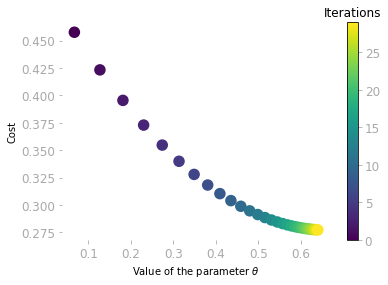

In [22]:
# Question 4 - insert comments here
# Initialize the learning rate and the initial value of the parameter theta
lr = 0.1
theta = 0
# Lists to store the values of theta and the corresponding cost 
theta_all = []
cost_all = []

# Perform gradient descent for 30 iterations
for i in range(30):
    # Update theta using the gradient of the Mean Squared Error (MSE) with respect to theta    
    theta = theta - lr * MSE_derivative(x=X, y=Y, theta=theta)
    # Calculate the cost (MSE) for the current theta
    cost = MSE(X, Y, theta)
    # Append the updated theta and cost to their respective lists
    theta_all.append(theta)
    cost_all.append(cost)

# Create a scatter plot showing the relationship between theta and cost    
plt.scatter(theta_all, cost_all, linewidth=1.5, c=np.arange(len(cost_all)))
plt.xlabel(r"Value of the parameter $\theta$")
plt.ylabel("Cost")
clb = plt.colorbar()
clb.ax.set_title('Iterations')
plt.show()



Figure 5: Cost as a function of the parameter $\theta$. The cost decreases at each iteration. We are trying to find the value of theta at the turning point of the curve - where the derivative is zero.

You can see in Figure [5] that the
cost decreases at each iteration. But a lot depended on the initial choice of theta. Try other values of theta to see what happens (no need to show this work).

Let’s see what is the best parameter
value that you got and use it to plot the corresponding regression line:

In [23]:
# Question 4 - insert comments here
# Get the final best slope (theta) and lowest cost
best_slope = theta_all[-1]
print("best slope",best_slope)
lowest_cost = cost_all[-1]
print("lowest cost",lowest_cost)

best slope 0.6397279936234294
lowest cost 0.27725739907989283


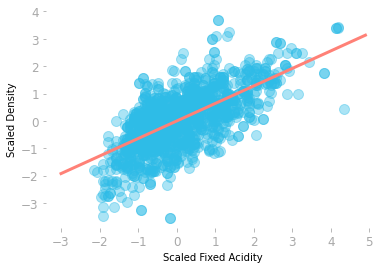

In [24]:
# Question 4 - insert comments here
# Create a linear regression line using the best slope
x_axis = np.arange(-3, 5, 0.1)
y_axis = best_slope * x_axis
plt.scatter(X, Y, alpha=0.4, zorder=0)
plt.plot(x_axis, y_axis, c='#FF8177')

# Plot the data points and the regression line
plt.xlabel("Scaled Fixed Acidity")
plt.ylabel("Scaled Density")
plt.show()




You can see in Figure [6] that after
30 iterations you reach a slope that fits the data well.



# Further reading

If you would like to read more on this topic, read the following section in the text, Essential Math
### 1.3.4 BONUS: MSE Cost Function With Two Parameters

where you’ll see now how to proceed with multiple parameters.




# Question 5

Compute the correlation of the fixed acidity and density. What does that have to do with the regression line?

Draw a conclusion about the fixed acidity and density of red wine from your regression line. Explain it in terms of what information this line provides. How can it be used? What does it mean specifically for this example?

In [25]:
#calculate correlation
corr = np.corrcoef(data['fixed acidity'],
            data['density'])[0,1]

print("Correlation Coefficient between Fixed Acidity and Density:", corr)

Correlation Coefficient between Fixed Acidity and Density: 0.6680472921189741


# Provide answer to question 5 here.

The correlation coefficient is a positive number and is close to 1 so there is a strong positive linear relationship between fixed acidity and density. An increase in in fixed acidity levels correlates with an increase in wine density.

A regression line between acidity and density would represent a best fit line through points that minimizes the sum or average of squared differences between the two values. It can be used to predict how one variable affects the other. For this example it can help during the wine making process to understand how the acidity content of wine affects it density. For this example the higher the acidity the higher the density.

#Congratulation, you have learned
about one of the core mathematical
principles of machine learning: *gradient descent*. In machine learning,
algorithms *learn* by minimizing the cost function. Instead of
calculating the cost for all combination of parameters, derivatives
tells you how to modify the parameter to decrease the cost.

# Question 6

Choose 2 other meaningful variables from the red wine data and perform the above steps for these 2 new variables.

Look at the scatter plot of these variables. Then find the best slope of the regression line and plot it on top of the scatter plot. Also compute the Correlation of the two variables.

Draw a conclusion from your regression line. Compare and contrast to the correlation.

If you are so inclined, instead, you may do a problem with 3 variables, 2 inputs and 1 output. See section 1.3.4 in the text, Essential Math for guidence.


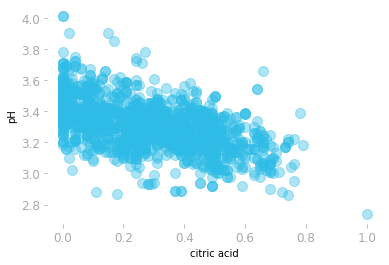

0.5419041447395095

In [30]:
#Enter code for #6 here
# Scatter plot: Display the relationship between 'citric acid' and 'pH'
plt.scatter(data['citric acid'], data['pH'], alpha=0.4)
# [...] Add axes, labels etc.

# Set the x-axis label
plt.xlabel("citric acid")

# Set the y-axis label
plt.ylabel("pH")

# Show the plot
plt.show()

# Extract 'citric acid' data and reshape it into a column vector
X = data['citric acid'].to_numpy().reshape(-1, 1)

# Get the shape of X (number of samples, number of features)
X.shape

# Extract 'pH' data and reshape it into a column vector
Y = data['pH'].to_numpy().reshape(-1, 1)

# Get the shape of Y (number of samples, number of features)
Y.shape

# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
Y = standard_scaler.fit_transform(Y)

# Calculate the derivative of the Mean Squared Error (MSE) with respect to theta (initialized as 0)
MSE_derivative(x=X, y=Y, theta=0)

In [27]:
lr = 0.01
theta = 0
theta = theta - lr * MSE_derivative(x=X, y=Y, theta=theta)
theta

-0.005419041447395095

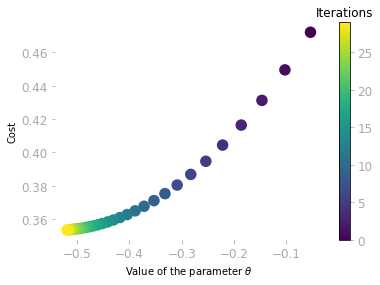

In [28]:
# Initialize the learning rate and the initial value of the parameter 
lr = 0.1
theta = 0
# Lists to store the values of theta and the corresponding cost function
theta_all = []
cost_all = []

for i in range(30):
    # Update theta using the gradient of the Mean Squared Error (MSE) with respect to theta
    theta = theta - lr * MSE_derivative(x=X, y=Y, theta=theta)
    # Calculate the cost (MSE) for the current theta
    cost = MSE(X, Y, theta)
    # Append the updated theta and cost to their respective lists
    theta_all.append(theta)
    cost_all.append(cost)

# Create a scatter plot showing the relationship between theta and cost    
plt.scatter(theta_all, cost_all, linewidth=1.5, c=np.arange(len(cost_all)))

plt.xlabel(r"Value of the parameter $\theta$")
plt.ylabel("Cost")
clb = plt.colorbar()
clb.ax.set_title('Iterations')
plt.show()

best slope -0.5189322003698613
lowest cost 0.3534338040711315


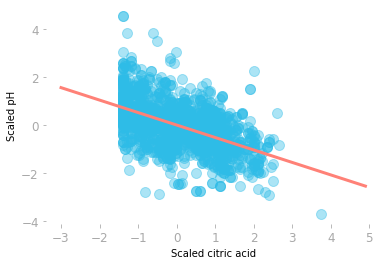

Correlation Coefficient between Fixed citric acid and pH: -0.5419041447395095


In [29]:
# Get the final best slope (theta) and lowest cost
best_slope = theta_all[-1]
print("best slope",best_slope)
lowest_cost = cost_all[-1]
print("lowest cost",lowest_cost)

# Create a linear regression line using the best slope
x_axis = np.arange(-3, 5, 0.1)
y_axis = best_slope * x_axis

# Plot the data points and the regression line
plt.scatter(X, Y, alpha=0.4, zorder=0)
plt.plot(x_axis, y_axis, c='#FF8177')

plt.xlabel("Scaled citric acid")
plt.ylabel("Scaled pH")
plt.show()

corr = np.corrcoef(data['citric acid'],
            data['pH'])[0,1]

print("Correlation Coefficient between Fixed citric acid and pH:", corr)

#6 continued:
 Enter text for conclusion to problem 6 here. Explain what information this line provides. How can it be used? What does it mean specifically for this example?

The correlation coefficient is a negative number and is close to -1 so there is a strong negative linear relationship between fixed citric acid and pH. An increase in in fixed citric acid levels correlates with a decrease in wine pH.

This can be used to predict how one variable affects the other. For this example it can be helpful in determining if increased citric acid levels increases or decreases wine pH in this case it decreases it this could be useful during the wine making process to keep the pH levels at a safe range (not too high or too low) for consumption when working with citric acid. For this example the higher the citric acid level the lower the pH.